# Data Analysis of NWC Teams in 2018 Season

In [8]:
import pandas as pd

In [206]:
wu18 = pd.read_csv("WU2018.csv", na_values="-")
wu18.fillna(0, inplace=True)
gf18 = pd.read_csv("GFU2018.csv", na_values="-")
gf18.fillna(0, inplace=True)
lc18 = pd.read_csv("LC2018.csv", na_values="-")
lc18.fillna(0, inplace=True)
whit18 = pd.read_csv("Whit2018.csv", na_values="-")
whit18.fillna(0, inplace=True)
ps18 = pd.read_csv("PSU2018.csv", na_values="-")
ps18.fillna(0, inplace=True)
#ps18.replace('0', -99999, inplace = True) #makes as an outlier

In [251]:
df = pd.concat([wu18, gf18, lc18, whit18, ps18], keys=["wu18", "gf18","lc18", "whit18", "ps18"]) #combine both date frames
df=df.rename(columns = {'GOFO':'GO/FO'})


In [212]:
df['W/L'] = "Loss"
df.loc[(df.W == 1), 'W/L'] = "Win"

In [254]:
dfs = [wu18,gf18,lc18,whit18,ps18]
teams = ["Willamette", "George Fox", "Lewis & Clark", "Whitworth", "Puget Sound"]

In [150]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

#### GO/FO vs Wins for all teams

Willamette


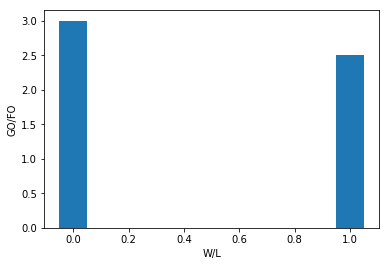

George Fox


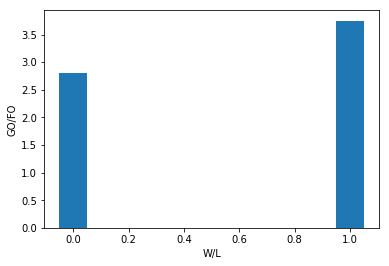

Lewis & Clark


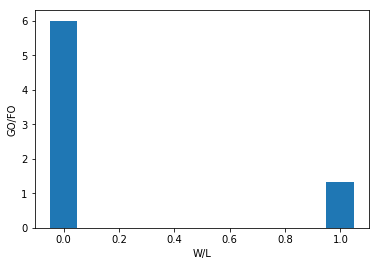

Whitworth


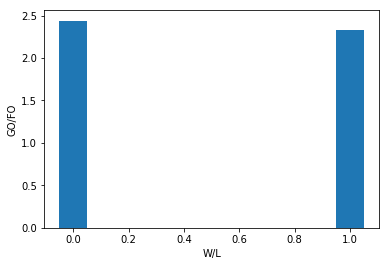

Puget Sound


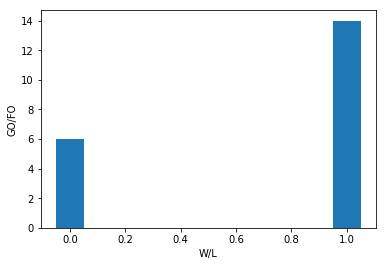

In [216]:
n=0
for i in dfs:
    print(teams[n])
    plt.xlabel("W/L")
    plt.ylabel("GO/FO")   
    plt.bar(i['W'],i['GO/FO'], align = "center", width=.1)
    plt.show()
    n+=1

In [204]:
n=0
for i in dfs:
    print(teams[n])
    print(i.groupby('W', as_index=False)['GO/FO'].mean(), "\n")
    n+=1

Willamette
   W     GO/FO
0  0  1.106316
1  1  0.946774 

George Fox
   W     GO/FO
0  0  0.922632
1  1  1.154400 

Lewis & Clark
     W     GO/FO
0  0.0  1.047188
1  1.0  0.777778 

Whitworth
     W     GO/FO
0  0.0  1.049167
1  1.0  1.047059 

Puget Sound
     W     GO/FO
0  0.0  1.381154
1  1.0  1.796471 



#### SB vs Wins for all teams

In [222]:
n=0
for i in dfs:
    print(teams[n])
    print(i.groupby('W', as_index=False)['SB'].mean(), "\n")
    n+=1

Willamette
   W        SB
0  0  0.789474
1  1  1.935484 

George Fox
   W        SB
0  0  0.894737
1  1  1.320000 

Lewis & Clark
     W        SB
0  0.0  0.906250
1  1.0  2.111111 

Whitworth
     W        SB
0  0.0  0.875000
1  1.0  1.117647 

Puget Sound
     W        SB
0  0.0  0.653846
1  1.0  1.235294 



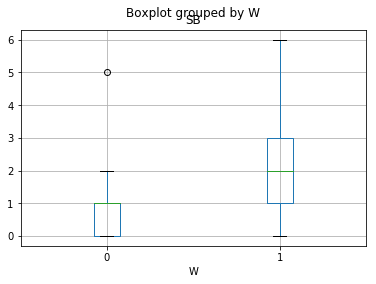

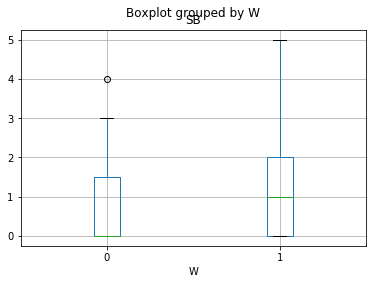

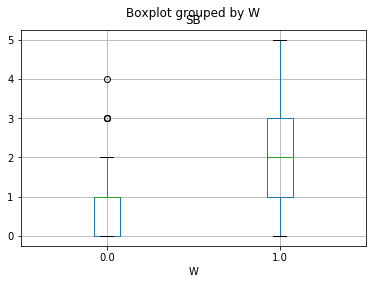

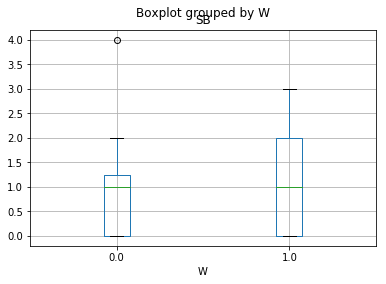

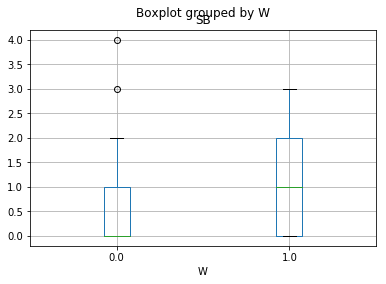

In [237]:
n=0
for i in dfs:
    i.boxplot('SB', by="W")
 

## ANOVA
#### Willamette University

In [227]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Null = No difference in stolen bases between Wins and Losses
#### df_between = 1, df_within = 48
#### critical values = 4.034 ... If F > 4.034 reject null
#### sum sqr within = 15.47, sum sqr between = 91.028
#### F = 15.471138/(91.02886/48) = 8.158
#### We reject the null hypothesis.  Wins and losses differed significantly on number of stolen bases

In [229]:
mod = ols('SB ~ W', data=wu18).fit()
anova = sm.stats.anova_lm(mod,typ=2)
print(anova)

             sum_sq    df         F    PR(>F)
W         15.471138   1.0  8.158013  0.006317
Residual  91.028862  48.0       NaN       NaN


#### F = 5.856.  We reject the null hypothesis.  Wins and losses differed significantly on number of sacrafice hits

In [253]:
mod = ols('SH ~ W', data=wu18).fit()
anova = sm.stats.anova_lm(mod,typ=2)
print(anova)

            sum_sq    df         F    PR(>F)
W          4.74961   1.0  5.856126  0.019359
Residual  38.93039  48.0       NaN       NaN


#### F = .00697.  We fail to reject the null.  There is not significant evidence that suggests strikeouts by Willamette's pitchers results in a difference in wins and losses.

In [269]:
mod = ols('KA ~ W', data=wu18).fit()
anova = sm.stats.anova_lm(mod,typ=2)
print(anova)

              sum_sq    df         F    PR(>F)
W           0.054329   1.0  0.006974  0.933794
Residual  373.945671  48.0       NaN       NaN
